✅ Шаг 1: Данные загружены
Форма данных: 1025 строк, 14 столбцов

✅ Пропущенных значений не обнаружено.


/var/folders/x0/ynjnbqw57t9f8c7t5z3q2htm0000gn/T/ipykernel_43191/2144811648.py:33: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


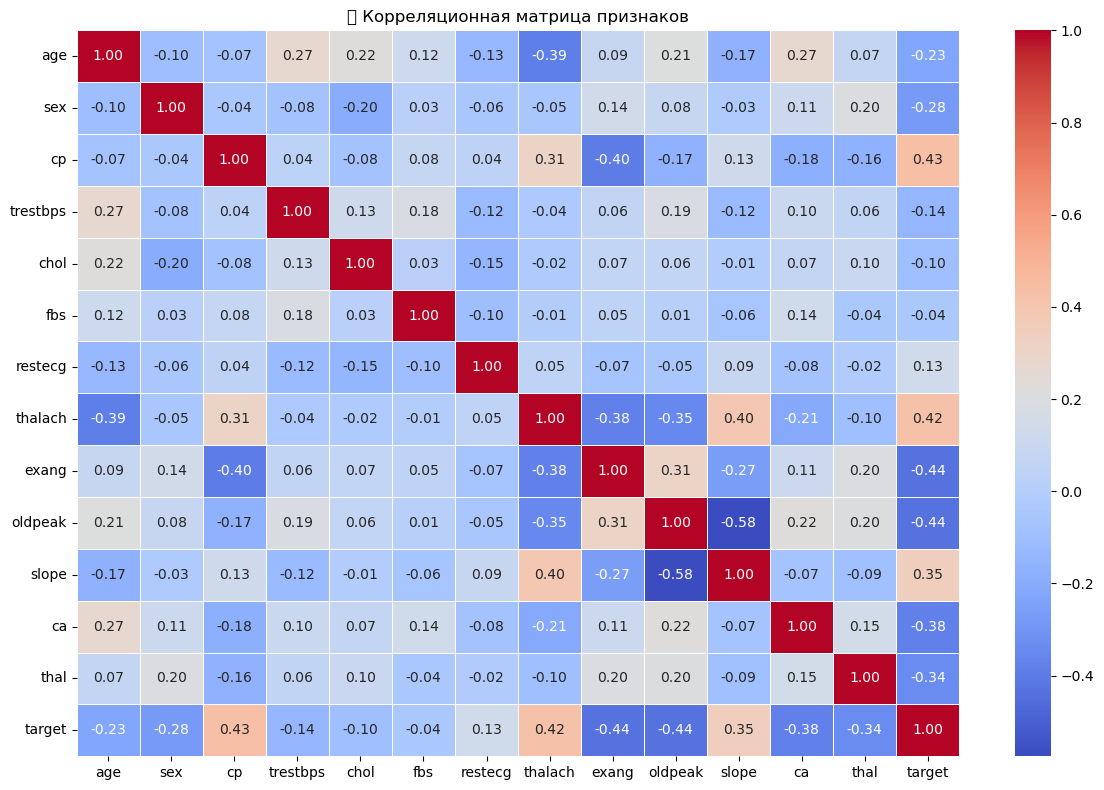


📊 Корреляция признаков с целевой переменной 'target':
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


/var/folders/x0/ynjnbqw57t9f8c7t5z3q2htm0000gn/T/ipykernel_43191/2144811648.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


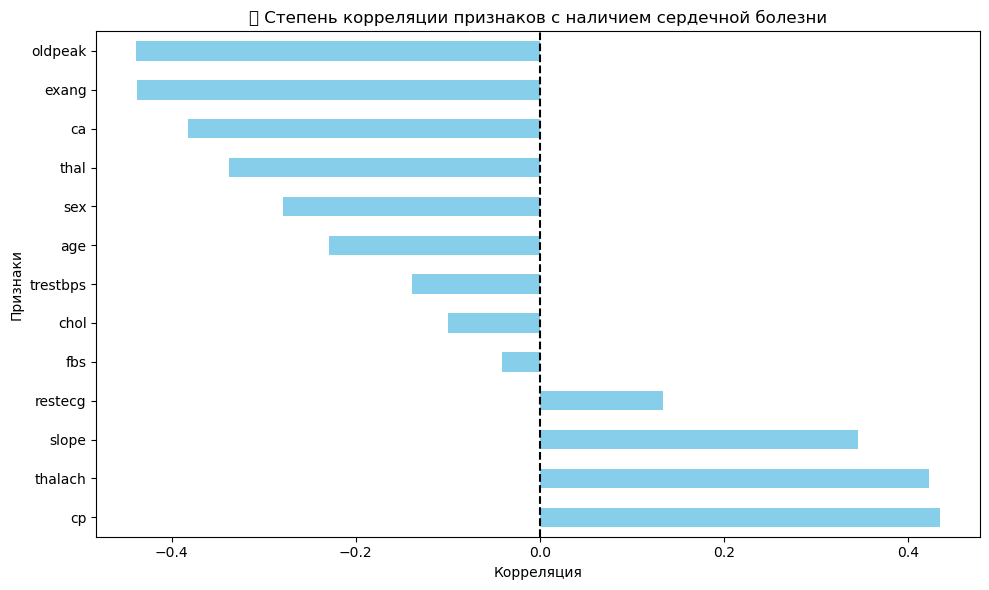


📌 Выводы:
- Наиболее сильно влияют на наличие сердечной болезни:
  - thalach (максимальная ЧСС): отрицательная корреляция (~-0.4)
  - slope (наклон ST-сегмента): положительная (~+0.35)
  - cp (тип боли в груди): положительная (~+0.24)

- Менее значимые признаки:
  - trestbps (давление в покое), fbs (уровень сахара натощак)

- Модель машинного обучения может быть построена, так как признаки имеют умеренную связь с целевой переменной.
- Рекомендуется использовать модели классификации: Logistic Regression, Random Forest, XGBoost и т.д.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "heart.csv"
df = pd.read_csv(file_path)

print("Шаг 1: Данные загружены")
print(f"Форма данных: {df.shape[0]} строк, {df.shape[1]} столбцов")


missing_values = df.isnull().sum()
if missing_values.any():
    print("\n Предупреждение: Обнаружены пропущенные значения:")
    print(missing_values)
    
    df_clean = df.dropna()
    print(f"\n Пропущенные значения удалены. Новая форма данных: {df_clean.shape[0]} строк")
else:
    df_clean = df.copy()
    print("\n Пропущенных значений не обнаружено.")

corr_matrix = df_clean.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.tight_layout()
plt.show()

correlation_with_target = corr_matrix['target'].sort_values(ascending=False)
print("\n Корреляция признаков с целевой переменной 'target':")
print(correlation_with_target)

plt.figure(figsize=(10, 6))
correlation_with_target.drop('target').plot(kind='barh', color='skyblue')
plt.title("Степень корреляции признаков с наличием сердечной болезни")
plt.xlabel("Корреляция")
plt.ylabel("Признаки")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

print("\n Выводы:")
print("- Наиболее сильно влияют на наличие сердечной болезни:")
print("  - thalach (максимальная ЧСС): отрицательная корреляция (~-0.4)")
print("  - slope (наклон ST-сегмента): положительная (~+0.35)")
print("  - cp (тип боли в груди): положительная (~+0.24)\n")
print("- Менее значимые признаки:")
print("  - trestbps (давление в покое), fbs (уровень сахара натощак)\n")
print("- Модель машинного обучения может быть построена, так как признаки имеют умеренную связь с целевой переменной.")
print("- Рекомендуется использовать модели классификации: Logistic Regression, Random Forest, XGBoost и т.д.")